In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.patches import Rectangle
import pandas as pd

In [3]:
data = np.loadtxt('data.txt', delimiter=',', skiprows=1)
dmod = data[:, 0]
dist = np.power(10, dmod/5-5)
vel = data[:, 1]

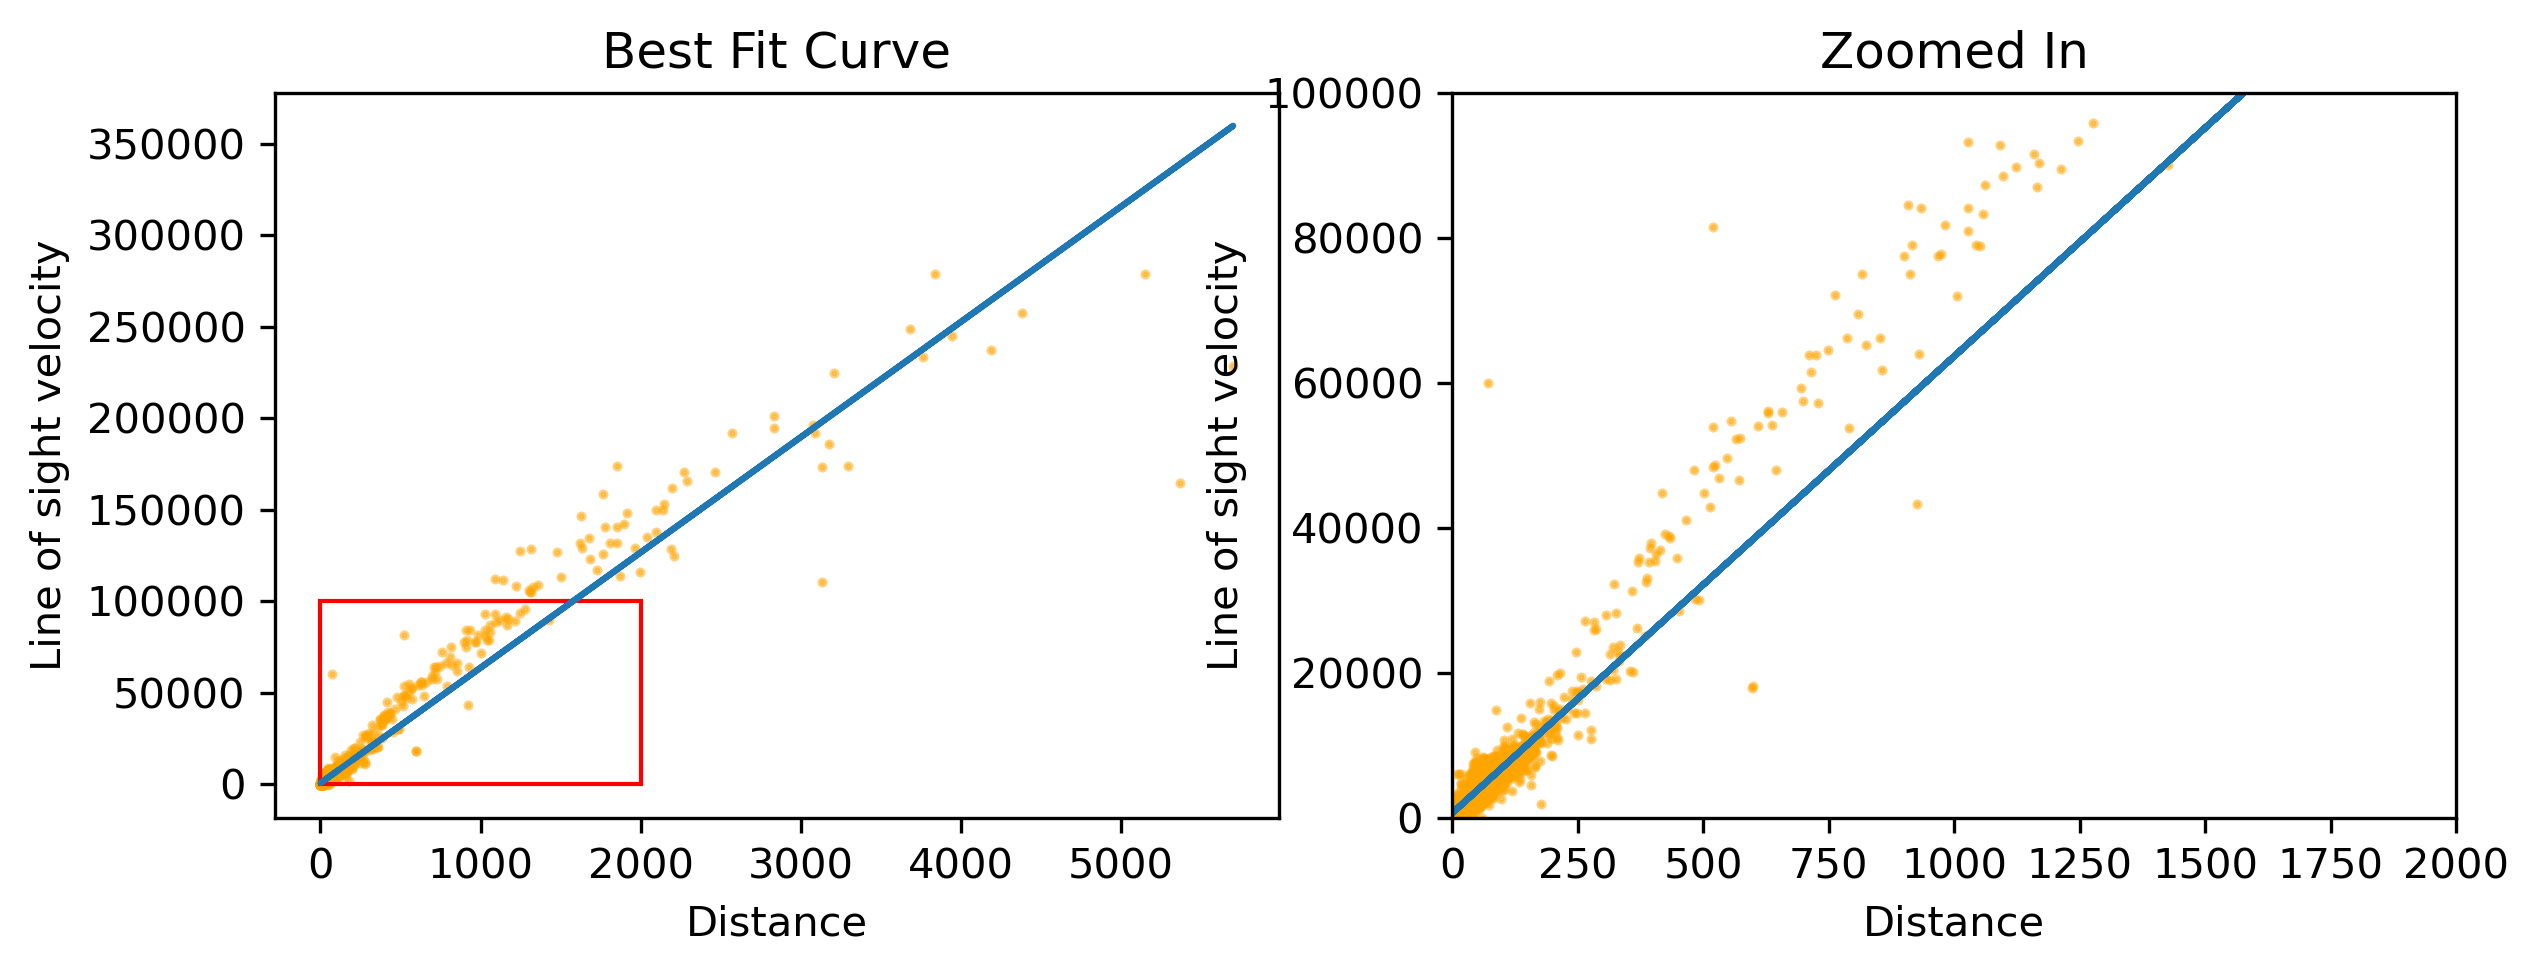

In [4]:
def rec_vel(x, m, c):
    return m*x+c;
# y = line of sight velocities
# x = distance to the galaxy in Mpc
y=vel
x=dist
# Curve fitting
p_opt, p_cov = curve_fit(rec_vel, x, y)

Curve, axes = plt.subplots(1, 2, figsize=(8, 3), dpi=300)
Curve.tight_layout()
axes[1].set_xlim([0, 2*10**3])
axes[1].set_ylim([0, 10**5])
axes[1].set_title("Zoomed In")
axes[0].set_title("Best Fit Curve")

for i in range(2):
    axes[i].plot(x, rec_vel(x, *p_opt))
    axes[i].scatter(x, y, color='orange', alpha=0.5, s=2)
    axes[i].set_xlabel('Distance')
    axes[i].set_ylabel('Line of sight velocity')
rect = Rectangle((0, 0), 2*10**3, 10**5, lw=1, edgecolor='red', facecolor='none')
axes[0].add_patch(rect)

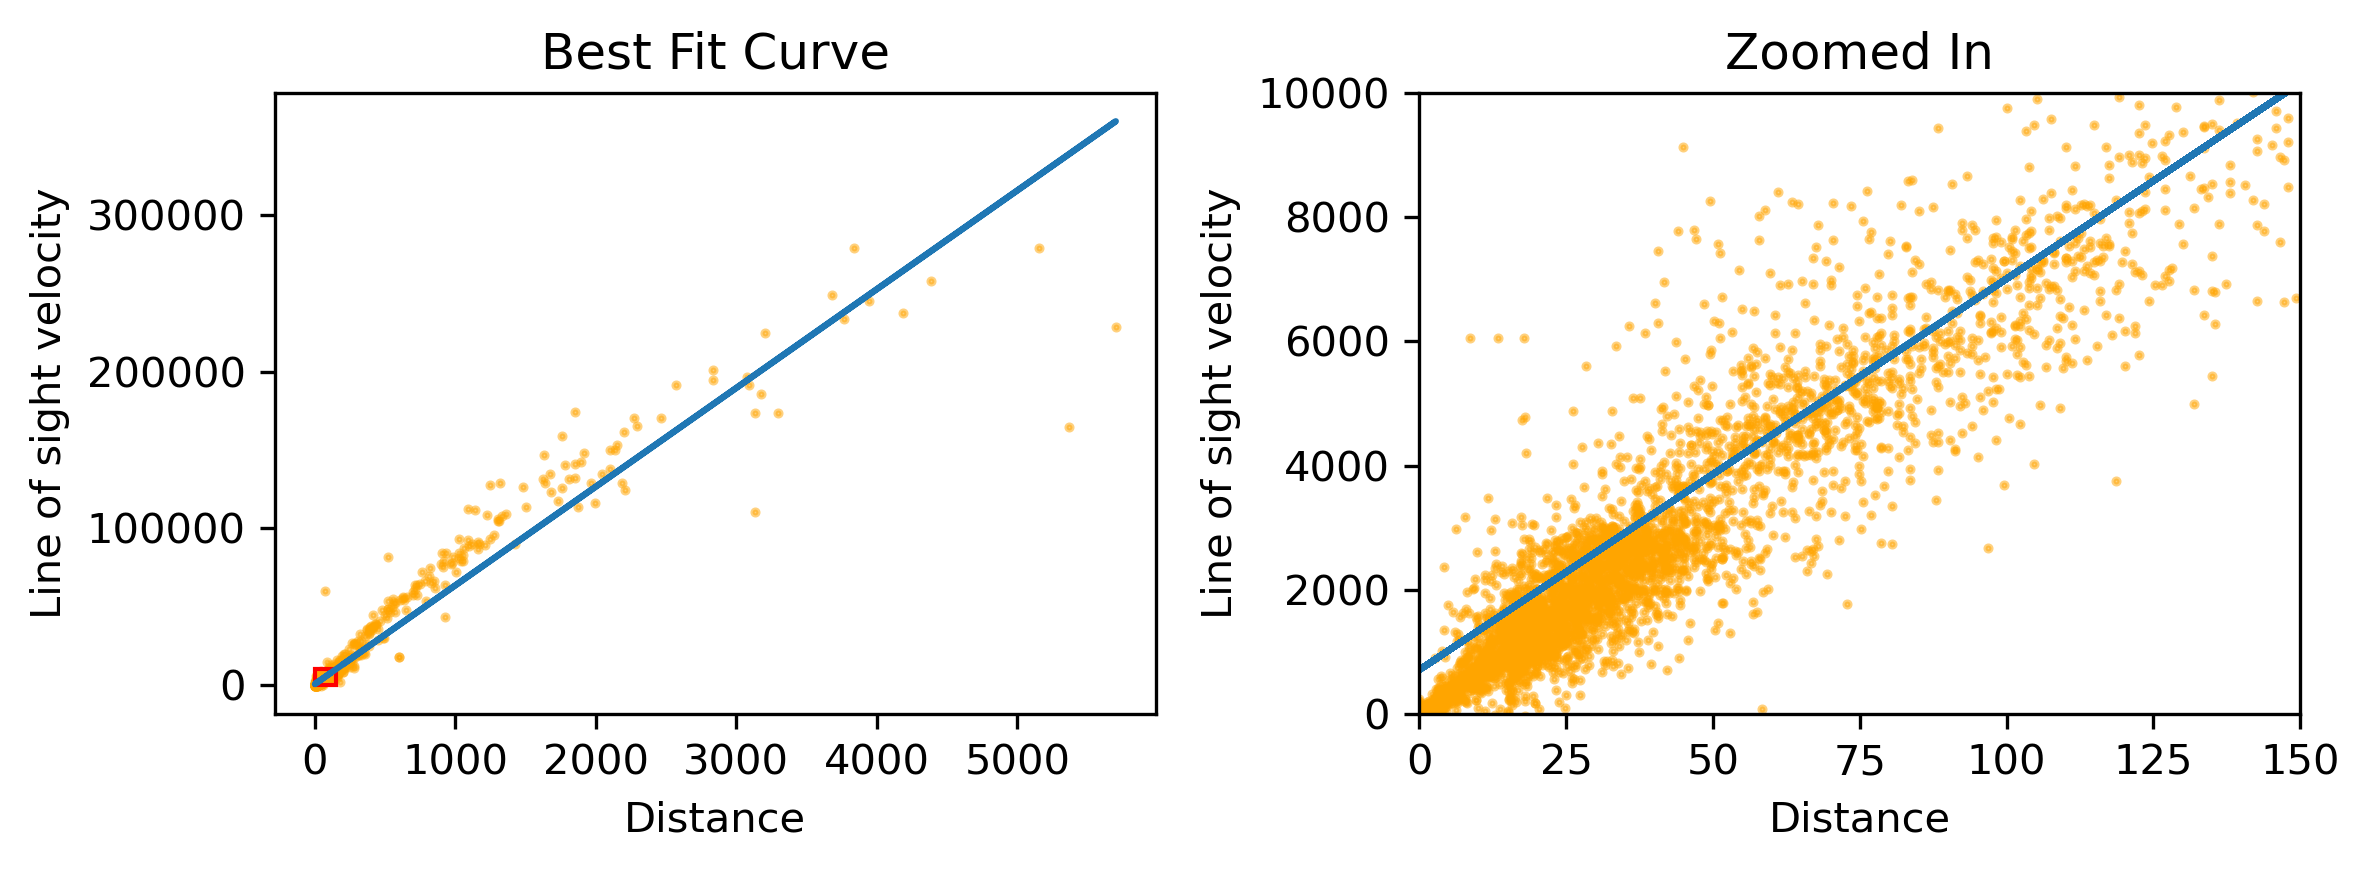

In [5]:
# Curve fitting
p_opt, p_cov = curve_fit(rec_vel, x, y)

# Plotting the filtered data
Curve, axes = plt.subplots(1, 2, figsize=(8, 3), dpi=300)
axes[1].set_xlim([0, 150])
axes[1].set_ylim([0, 10**4])
axes[1].set_title("Zoomed In")
axes[0].set_title("Best Fit Curve")

for i in range(2):
    axes[i].plot(x, rec_vel(x, *p_opt))
    axes[i].scatter(x, y, color='orange', alpha=0.5, s=2)
    axes[i].set_xlabel('Distance')
    axes[i].set_ylabel('Line of sight velocity')
rect = Rectangle((0, 0), 150, 10**4, lw=1, edgecolor='red', facecolor='none')
axes[0].add_patch(rect)
Curve.tight_layout()

In [6]:
HUBBLE = p_opt[0]/(3.086 * 10**19)
UNIVERSE = (1/HUBBLE)/(60 * 60 * 24 * 365)
print(f"The universe is {UNIVERSE/10**9} billion years old")

The universe is 15.536801099692822 billion years old
